# **CUSTOMER CHURN PREDICTION**

## **INTRODUCTION**

## **Background**

In the dynamic landscape of business, customer churn, or the departure of customers from a product or service, is a critical metric that significantly impacts the success or failure of a company.

The telecommunications industry, serving as a cornerstone for connectivity services, faces the challenge of predicting and minimizing customer churn. The churn rate, measured over a specific time frame, reflects the percentage of customers discontinuing services, highlighting the need for effective customer retention strategies.

Customer churn is particularly pertinent in industries with multiple options for consumers, where dissatisfaction or difficulties can prompt users to explore alternatives. For businesses, the cost of acquiring new customers surpasses that of retaining existing ones. Successful customer retention not only increases the average lifetime value but also enhances the sustainability and growth potential of a company. In this context, customer churn prediction emerges as a crucial task, allowing organizations to proactively address potential issues, implement tailored retention strategies, and maximize the value of recurring subscriptions.

This task focuses on leveraging machine learning techniques to analyze the Telco customer churn dataset, emphasizing the importance of predicting and mitigating customer churn for sustained business success [1], [2], [3] [4].

## **Dataset Overview**

The Telco customer churn dataset provides insights into the interactions of a fictional telecommunications company with 7043 customers in California. Each entry in the dataset encompasses diverse demographic information, including customer tenure, contract details, internet service specifics, and additional features. Of particular interest are the target variables - the Satisfaction Score, Churn Score, and Customer Lifetime Value (CLTV) index, which collectively contribute to understanding customer loyalty and engagement.

The following are the columns of the dataset:

  - `CustomerID`: A unique ID that identifies each customer.
  - `Gender`: The customer’s gender: Male, Female
  - `SeniorCitizen`: Indicates if the customer is 65 or older: 1 (Yes), 0 (No).
  - `Partner`: Indicates if the customer is married: Yes, No
  - `Dependents`: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.
  - `Tenure`: Indicates the total amount of months that the customer has been with the company.
  - `PhoneService`: Indicates if the customer subscribes to home phone service with the company: Yes, No
  - `MultipleLines`: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No
  - `InternetService`: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.
  - `OnlineSecurity`: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No
  - `OnlineBackup`: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No
  - `DeviceProtection`: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No
  - `TechSupport`: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No
  - `StreamingTV`: Indicates if the customer uses their Internet service to stream television programme from a third party provider: Yes, No. The company does not charge an additional fee for this service.
  - `StreamingMovies`: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.
  - `Contract`: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.
  - `PaperlessBilling`: Indicates if the customer has chosen paperless billing: Yes, No
  - `PaymentMethod`: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check
  - `MonthlyCharge`: Indicates the customer’s current total monthly charge for all their services from the company.
  - `TotalCharges`: Indicates the customer’s total charges, calculated to the end of the quarter specified above.
  - `Churn`: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value. [6].

## **DATA CLEANING AND WRANGLING**

### **Importing Libraries**

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from imblearn.over_sampling import SMOTE

# Model Selection and training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

# Performance metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score
from sklearn.metrics import make_scorer, f1_score, balanced_accuracy_score

# Model tuning
from sklearn.model_selection import GridSearchCV, StratifiedKFold

# To see all plots generated by matplotlib in the notebook,
# the below line is added
%matplotlib inline

### **Data ingestion**

In the following code cells, the datasets will be loaded and merged using the `pandas`

In [2]:
# Reading the telco dataset
customer_data = pd.read_csv('data/Telco-Customer-Churn.csv')

### **Data Overview**


Upon importing datasets using the Pandas library in Python, it becomes imperative to initiate a preliminary exploration of the data. Given that the datasets are structured in a tabular format, a valuable method for gaining rapid insights is the utilization of the head() function from Pandas.

By employing the head() function, one can efficiently view the first few rows of the dataset, offering a concise snapshot that aids in swiftly grasping the data's structure and contents.

This preliminary examination serves as a fundamental step in the exploratory data analysis (EDA) process. It empowers researchers to develop well-informed strategies for subsequent data processing and analysis, laying the groundwork for a comprehensive understanding of the dataset's characteristics.

In [3]:
# viewing the first five observations of the dataset
customer_data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


The dataframe above shows the first five observations of the dataset an as it can be seen, there are twenty columns in the dataframe which agrees with the number of columns described in the dataset.

### **Data Description**

Different properties of the dataset will be explored

#### **Data Shape**

This gives the number of observations as well as the number of features in the dataset

In [4]:
# Obtaining the shape of the dataframe

print(f'Number of Observations: {customer_data.shape[0]}\
      \nNumber of Features: {customer_data.shape[1]}')

Number of Observations: 7043      
Number of Features: 21


#### **Data Info**

In [5]:
# Checking information about the data
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### **Features and Data Types**

A list of all the features with their respective datatypes is obtained.

In [6]:
# A list containing the feature names and will be used to
# create the dataframe
name_1 = []

# Another list, containing the data types for each columns
dtype_1 = []

for i in range(len(customer_data.columns)):
    name_1.append(customer_data.columns[i])
    dtype_1.append(customer_data[customer_data.columns[i]].dtype.name)

# Creating a dictionary for the variable names and data types
var_dtype = {'Variables': name_1, 'Data_Types': dtype_1}

# A dataframe of the variable names and data types
variables_datatypes = pd.DataFrame(var_dtype)

# Viewing the dataframe
display(variables_datatypes)

,Variables,Data_Types
0,customerID,object
1,gender,object
2,SeniorCitizen,int64
3,Partner,object
4,Dependents,object
5,tenure,int64
6,PhoneService,object
7,MultipleLines,object
8,InternetService,object
9,OnlineSecurity,object


Upon examining the dataset, it is evident that only the columns labeled `SeniorCitizen`, `tenure`, and `MonthlyCharges` possess numerical data, while the remaining columns are comprised of object data types. However, a more in-depth analysis reveals that the `TotalCharges` column should also be considered a numerical feature.

Upon closer inspection, it is noted that there are 16 categorical features in the dataset. To facilitate model training, these categorical features will undergo conversion into numerical data types using appropriate representations.

It is worth noting that the `SeniorCitizen` feature, despite being of integer data type, warrants further investigation into the nature of its values. This exploration will contribute valuable insights for subsequent analyses.

In [7]:
# Checking the entries in the SeniorCitizen column
customer_data['SeniorCitizen'].unique()

array([0, 1], dtype=int64)

The result above shows that the `SeniorCitizen` column is a categorical feature with two classes of integer values.

<br>

### **Categorical Variables - Number of Unique Entries.**

Variables labeled with object data types are distinctly characterized as categorical variables, a characterization further supported by consulting the dataset overview for descriptions.

The confirmation of their categorical nature can be substantiated by investigating whether these variables display a limited set of unique values or categories. This analysis helps validate their categorical classification.

In [8]:
# Computing the number of unique entries in each column

categories = []

# A list containing the data types for each column
nunique = []


for i in range(len(customer_data.columns)):
    if customer_data[customer_data.columns[i]].dtype.name == 'object':
        categories.append(customer_data.columns[i])
        nunique.append(customer_data[customer_data.columns[i]].nunique())

# Creating a dictionary for the variable names and data types
nunique_dict = {'Variables': categories,
             'No_unique_entries': nunique}

# A dataframe of the variable names and data types
cat_var_nunique = pd.DataFrame(nunique_dict)

# Viewing the dataframe
display(cat_var_nunique)

,Variables,No_unique_entries
0,customerID,7043
1,gender,2
2,Partner,2
3,Dependents,2
4,PhoneService,2
5,MultipleLines,3
6,InternetService,3
7,OnlineSecurity,3
8,OnlineBackup,3
9,DeviceProtection,3


<br>

***Identification of Categorical Columns***

Upon reviewing the dataset, it is evident that a majority of the columns contain categorical data. The nature of these columns suggests that they likely encompass information such as demographics, service types, or other categorical attributes related to the customers.

<br>

***Unique Entries in customerID Column***

It is observed that the `customerID` column contains 7043 unique entries, aligning with the total number of observations in the dataset. As anticipated, this column serves as a unique identifier for each customer, ensuring individuality across the dataset.

<br>

***Data Type Anomaly in TotalCharges Column***

Notably, the `TotalCharges` column is reported to have 6531 entries, indicating that there might be missing or improperly formatted data. Further investigation reveals that the entries in this column are in float format. This discrepancy suggests a potential conversion of this column to an object data type during the data storage process, potentially leading to inconsistencies in data representation.

<br>

***Data Type Correction for TotalCharges Column***

In response to the identified anomaly, it is deemed necessary to rectify the data type of the `TotalCharges` column. Given that the entries are in float format, converting the column to the appropriate data type of float is essential to ensure the accuracy and compatibility of the data. This correction aligns the data representation with the nature of the values in the TotalCharges column, facilitating seamless analytical operations.

#### **Converting the `TotalCharges` column to float**

In [9]:
# converting TotalCharges column to float data type

customer_data['TotalCharges(float)'] = pd.to_numeric(customer_data['TotalCharges'], errors='coerce')

In the process of transforming the `TotalCharges` column into a numerical data type, instances where conversion was not possible resulted in the assignment of NULL values.

A thorough examination revealed that these NULL values originated from the presence of empty strings in the input data.

Despite the absence of missing values in the column initially, the emergence of NULL values prompted a subsequent investigation to correlate them with their original entries, aiming to comprehend the nature of the data in those specific observations.

In [10]:
# Checking the columns with the missing values
customer_data[customer_data['TotalCharges(float)'].isnull()][['TotalCharges(float)', 'TotalCharges']]

,TotalCharges(float),TotalCharges
488,NaN,
753,NaN,
936,NaN,
1082,NaN,
1340,NaN,
3331,NaN,
3826,NaN,
4380,NaN,
5218,NaN,
6670,NaN,


The dataframe above shows that there are 11 observations in the `TotalCharges` column with missing values.

Given the relatively small number of these missing values (11 in total), the approach chosen is to substitute them with the mean value of the respective column.

In [11]:
# Calculating the mean value
mean_value = customer_data['TotalCharges(float)'].mean()

# filling in the missing values
customer_data['TotalCharges(float)'].fillna(mean_value, inplace=True)


**Checking to see that the missing values have been fixed**

In [12]:
# Checking the columns with the missing values
customer_data[customer_data['TotalCharges(float)'].isnull()][['TotalCharges(float)', 'TotalCharges']]

,TotalCharges(float),TotalCharges


The above outcome suggests that the issues related to missing values in the `TotalCharges` column with a data type of float have been successfully addressed.

## **Data Cleaning and Preprocessing**

### **Missing Values**

Identifying and managing missing values is essential for upholding the credibility of data analysis. It is crucial to pinpoint the underlying reasons for data gaps and devise a suitable plan for addressing them.

This plan might encompass the utilization of imputation techniques like mean or median imputation, or the exclusion of incomplete records, tailored to the specific characteristics and context of the missing data.

Effectively dealing with missing values not only guarantees the precision of analytical results but also enhances their reliability.

In [13]:
# Identifying Missing values
missing_values = customer_data.isnull().sum()

# Columns with missing values
missing_values[missing_values > 0]

Series([], dtype: int64)

The preceding result indicates that the dataframe is devoid of any missing values. Through a thorough examination of the dataset, no instances of null values were detected. The data appears to be complete and free from any gaps or incomplete entries.

### **EXPLORATORY DATA ANALYSIS**

#### **Data Visualization**

As the data types of most of the features in the dataset are categorical, a count plot will be used to view the categorical features based on the churn rate [2].

**Bar Plots for Categorical Features**

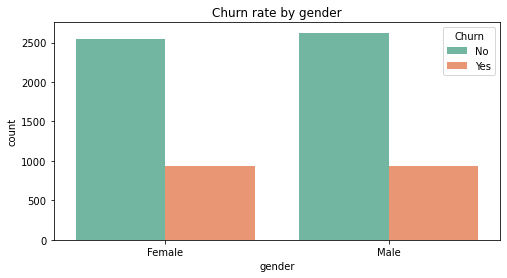

<Figure size 432x288 with 0 Axes>

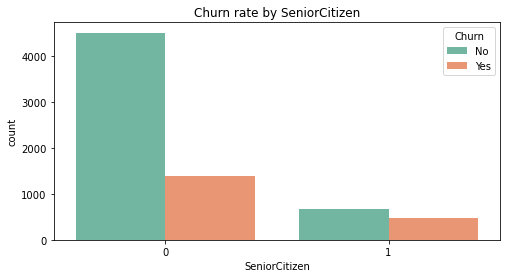

<Figure size 432x288 with 0 Axes>

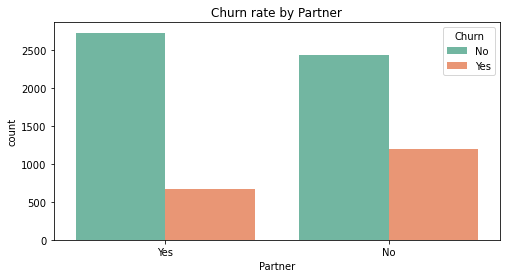

<Figure size 432x288 with 0 Axes>

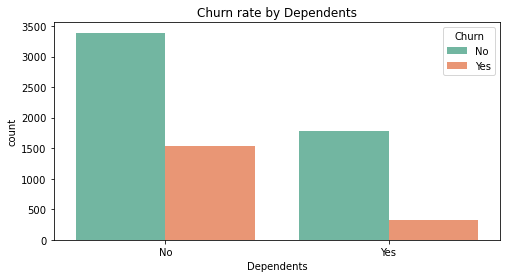

<Figure size 432x288 with 0 Axes>

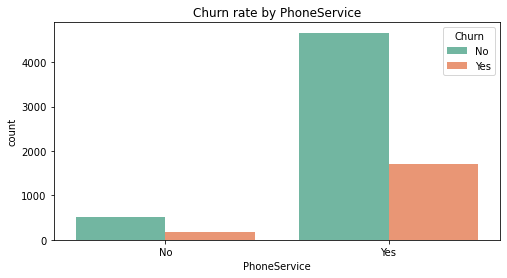

<Figure size 432x288 with 0 Axes>

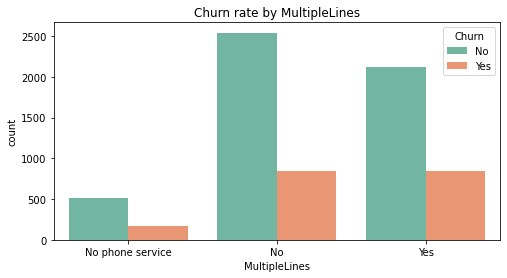

<Figure size 432x288 with 0 Axes>

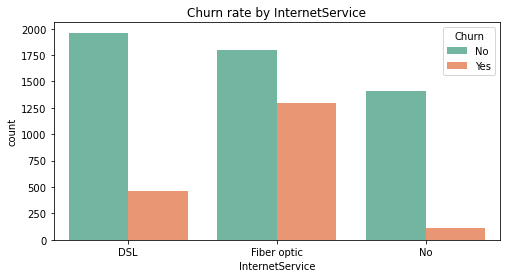

<Figure size 432x288 with 0 Axes>

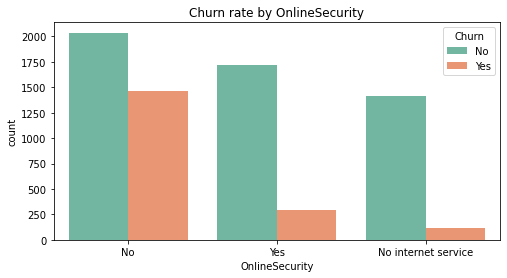

<Figure size 432x288 with 0 Axes>

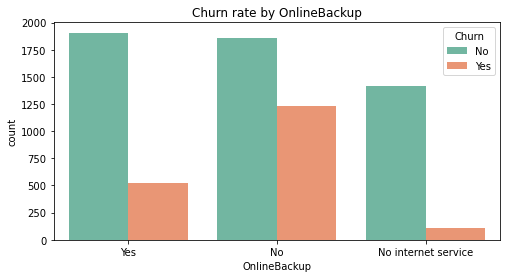

<Figure size 432x288 with 0 Axes>

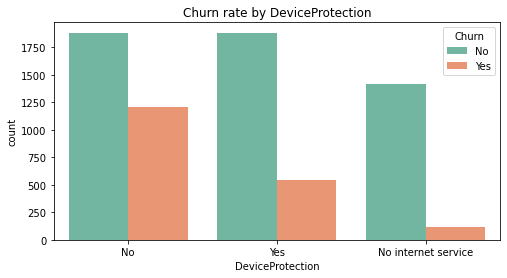

<Figure size 432x288 with 0 Axes>

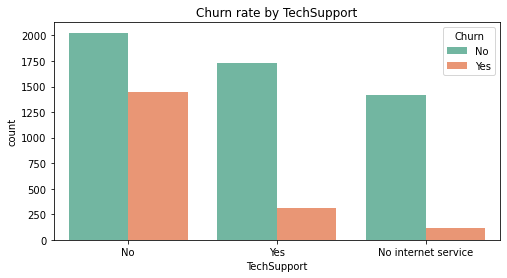

<Figure size 432x288 with 0 Axes>

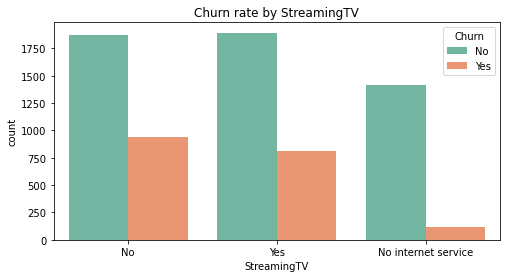

<Figure size 432x288 with 0 Axes>

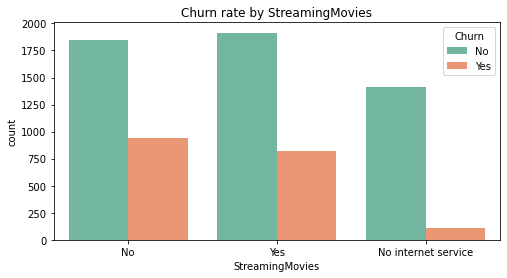

<Figure size 432x288 with 0 Axes>

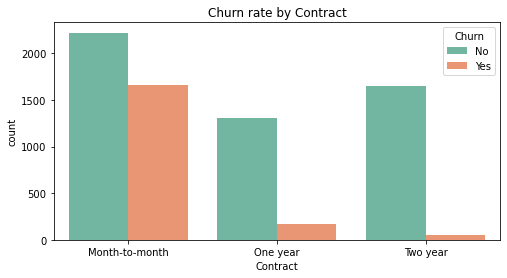

<Figure size 432x288 with 0 Axes>

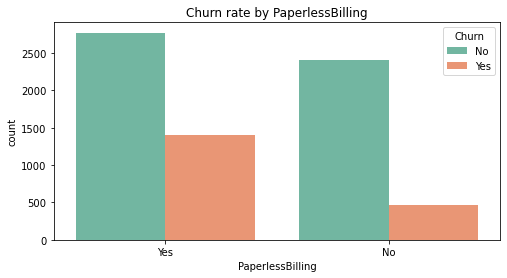

<Figure size 432x288 with 0 Axes>

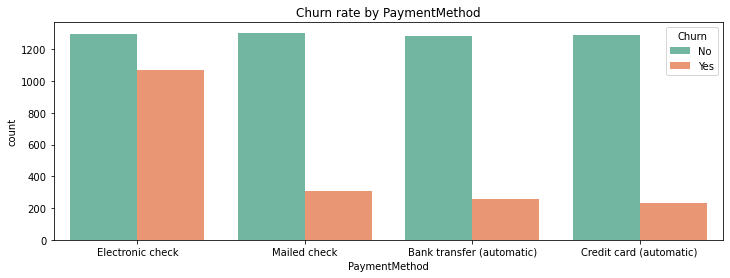

<Figure size 432x288 with 0 Axes>

In [14]:
# Features to be excluded from the categorical plots
excluded_features = ['customerID', 'tenure', 'MonthlyCharges',
                     'TotalCharges', 'TotalCharges(float)', 'Churn']

# Looping through all features
for col in customer_data.columns:
    if col not in excluded_features:    # Excluding numerical features
        print('\n')
        if customer_data[col].nunique() > 3: # Adjusting the figure size based
            plt.figure(figsize=(12, 4))     # on the number of categories
        else:
            plt.figure(figsize=(8, 4))
        sns.countplot(x=col, hue='Churn', data=customer_data, palette='Set2')
        plt.title(f'Churn rate by {col}')
        plt.savefig(f'images/plot_{col}.png')
        plt.show()
        plt.tight_layout()
        print('\n')                     # Creating spaces between charts

The dataset exhibits a fairly even distribution of gender and partners, with roughly equal representation in each category. Although there is a slightly higher churn rate among females, the difference is deemed inconsequential.

Notably, a discernible trend of churn is evident among younger customers (SeniorCitizen = 0), as well as customers lacking both partners and dependents.

The demographic analysis highlights non-senior citizens without partners and dependents as a distinct customer segment displaying an elevated propensity for churning. This emphasizes the significance of considering these factors when assessing customer retention strategies.

When customers face a lack of phone service, the option of having multiple lines is ruled out. A significant portion of phone service subscribers tends to show an increased likelihood of churning.

On the flip side, customers relying on fiber optic internet service display a higher tendency to churn, possibly influenced by factors such as heightened costs, market competition, and concerns about customer service.

The higher cost associated with fiber optic service, in comparison to DSL, may contribute to customer attrition.

Furthermore, customers who subscribe to additional services like OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport demonstrate a notable decrease in the inclination to churn. Interestingly, the presence of a Streaming service does not seem to follow a discernible predictive pattern for churn, as it is evenly distributed among both 'yes' and 'no' options.

The shorter the contract, the higher the churn rate. Those with more extended plans face additional barriers when canceling early. This clearly explains the motivation for companies to have long-term relationships with their customers.

Churn Rate is higher for the customers who opted for paperless billing. Customers who pay with electronic checks are more likely to churn, and this kind of payment is more common than other payment types.

### **Visualizing the Churn rate per category**

Evaluating the distribution balance within the churn feature of the dataset is a critical step in identifying potential data imbalances. It is imperative to ensure a fair representation of both churn and non-churn instances to foster an unbiased and dependable machine learning model.

This process involves a careful examination of the ratio between records associated with customer churn and those without. By doing so, valuable insights can be gained, shedding light on potential challenges that could stem from class imbalance.

It is essential to address such imbalances to prevent the model from being skewed towards the majority class. Rectifying this ensures an enhanced ability to accurately predict instances of interest, thereby contributing significantly to the overall robustness of the predictive analysis. This proactive approach ultimately strengthens the model's capacity to provide reliable insights into customer churn.

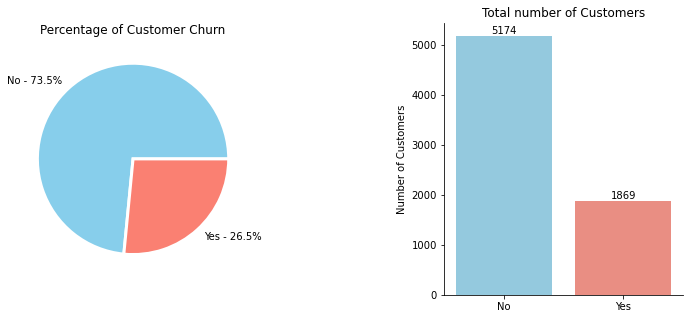

In [15]:
# Creating a space before the plot
print('\n\n')

# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Adjusting the space betweeen the subplots
plt.subplots_adjust(wspace=0.8)

# Defining the colors for each class
colors = ['skyblue', 'salmon', 'lightgreen']

# Number of observations in each category
data = customer_data['Churn'].value_counts()

# Creating a pie chart.
labels = [f'{label} - {np.round(data[label] / data.sum() * 100, 1)}%' for label in data.index]
ax1.pie(data, labels=labels, wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'},
        colors=colors)
ax1.set_title('Percentage of Customer Churn')

# Creating a bar plot.
ax2 = sns.barplot(data=data.to_frame(), y='Churn', x=data.index, palette=colors)

# Setting the label and title
ax2.set(xlabel=None, ylabel='Number of Customers')
ax2.bar_label(container=ax2.containers[0], labels=customer_data['Churn'].value_counts())
ax2.spines[['right', 'top']].set_visible(False)
ax2.set_title('Total number of Customers')
# Saving the plot
plt.savefig(f'images/churn_rate.png')
# Displaying the plot
plt.show()

<br>

The plot above offers a comprehensive view of the dataset's `Churn` column. On the horizontal axis of the count plot, the churn status is delineated, distinguishing between customers who have undergone churn and those who have not. Concurrently, the vertical axis denotes the frequency of occurrences within each category.

This graphical representation serves as a crucial tool for evaluating the distribution of data, with a particular focus on achieving a balanced representation of both churn and non-churn instances. Maintaining equilibrium between these classes is imperative for training a machine learning model that exhibits robust performance.

Examining the plots reveal a notable imbalance in the dataset, indicating a substantial difference in the number of instances between the two classes. To mitigate this imbalance, it becomes imperative to employ techniques such as resampling. Addressing these imbalances is crucial to enhance the model's ability to generalize well across both churn and non-churn scenarios.

<br>

**Class Imbalance and Model Training**


The dataset presents a significant class imbalance, with one class comprising a considerable majority and another representing a smaller minority. In response to this imbalance, machine learning algorithms known for their efficacy in handling imbalanced datasets will be chosen for model training.

Specifically, the Random Forest and Naive Bayes Classifier (NB) algorithms have been selected due to their inherent ability to consider class distribution during the learning process. The Random Forest algorithm, being an ensemble method, is particularly noteworthy for its demonstrated effectiveness in tackling challenges associated with class imbalance. This ensemble approach enhances the model's capability to address the skewed distribution of classes within the dataset.

<br>

In assessing model performance, particular attention will be given to metrics that exhibit sensitivity to class imbalance. Balanced accuracy, Precision, recall, and F1 score, will be given precedence over conventional accuracy metrics.

These chosen metrics offer a more nuanced insight into the model's proficiency in accurately detecting instances of the minority class, a critical aspect in the domain of customer churn prediction.

This strategic approach ensures a thorough evaluation of the model's effectiveness, especially in scenarios characterized by imbalanced classes, where relying solely on traditional accuracy measures may lead to a misrepresentation of performance.

#### **Data Visualization of Numerical Features**

**Histograms**

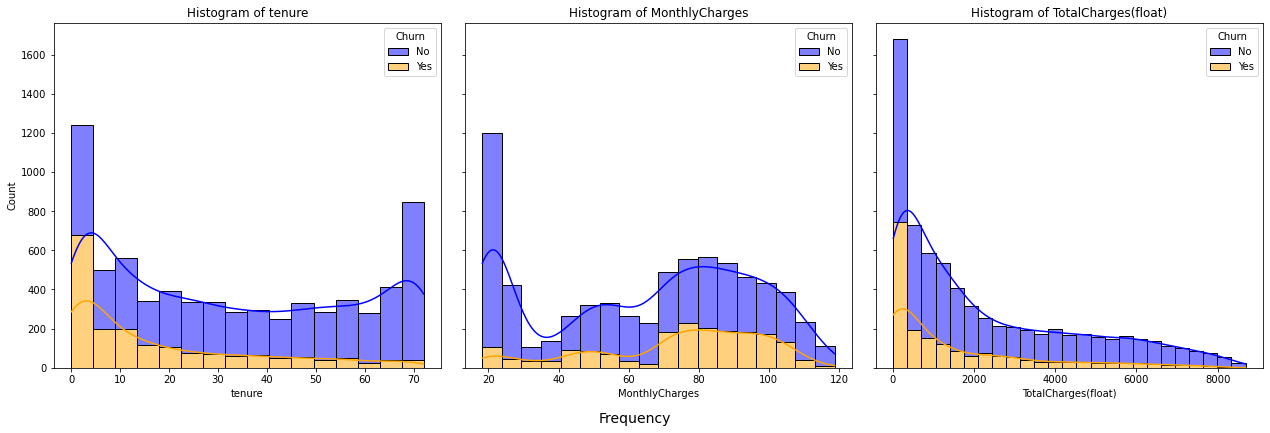

In [16]:
# 'Churn' is the column indicating churn categories ('Yes' or 'No')

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges(float)']

# Set up the figure and axis
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Define colors for the churn categories
colors = {'No': 'blue', 'Yes': 'orange'}

# Creating a space before the plot
print('\n')
# Iterate through numerical features
for i, feature in enumerate(numerical_features):
    # Plot histograms for each churn category
    sns.histplot(data=customer_data, x=feature, hue='Churn', multiple='stack', kde=True, ax=axes[i], palette=colors)
    axes[i].set_title(f'Histogram of {feature}')

# Set common y-axis label
fig.text(0.5, 0, 'Frequency', ha='center', va='center', fontsize=14)

# Saving the plot
plt.savefig(f'images/histograms_of_numerical_features.png')
# Adjust layout
plt.tight_layout(pad=2.0)
plt.show()


The histogram depicting customer tenure reveals a right-skewed distribution, indicating that a significant portion of customers has a relatively short association with the telecom company, predominantly within the initial 0-9 months. Correspondingly, the highest incidence of churn is observed during this initial period, highlighting that a considerable number of customers decide to discontinue services within their first 30 months.

Upon closer examination of the monthly charge histogram, a noteworthy pattern emerges - customers with higher monthly charges display an increased churn rate. This finding suggests a potential correlation between the attractiveness of discounts and promotions and customer retention.

In essence, it implies that the provision of discounts or promotional offers could serve as a compelling incentive for customers to sustain their subscriptions, thereby reducing the likelihood of churn. This insight highlights the importance of promotional strategies in fostering customer loyalty and mitigating churn risks.

**Box Plots for Numerical Features**

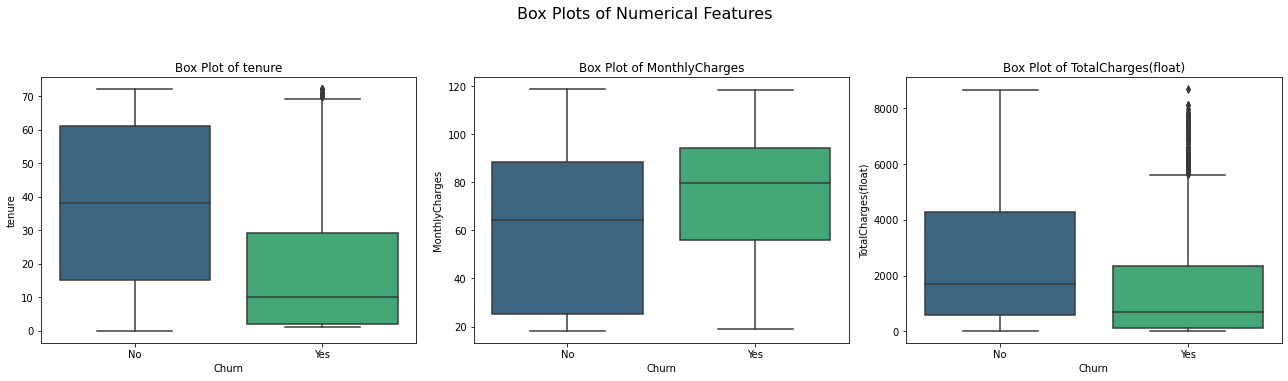

In [17]:
# Creating plots for Numerical features

# Creating the figure
plt.figure(figsize=(18, 5))

# Creating a space before the plot
print('\n')

for i, col in enumerate(numerical_features, 1):
    plt.subplot(1, 3, i)
    #sns.boxplot(x=col, color='skyblue', width=0.4)
    sns.boxplot(x='Churn', y=col, data=customer_data, palette='viridis')
    plt.title(f'Box Plot of {col}')

plt.suptitle('Box Plots of Numerical Features', y=1.05, size=16)
# Saving the plot
plt.savefig(f'images/box_plots_of_numerical_features.png')
plt.tight_layout()
plt.show()


The insights derived from the Box plot of the `tenure` align with the findings from the histogram, reinforcing the observation that customers who churned typically had a shorter tenure compared to those who remained. Notably, there are outliers in the churned category, potentially indicative of long-term customers exploring alternative telecommunication services.

Examining the `MonthlyCharges` column reveals a discernible pattern: customers with higher monthly charges exhibit a propensity to leave the company. This observation serves as additional evidence supporting the trends identified in the histograms, emphasizing the influence of monthly charges on customer retention.

Further analysis of the `TotalCharges` column indicates that customers who churned generally have lower total charges, with noticeable outliers. These outliers may represent cases where customers, despite being with the company for an extended period, opted to leave, possibly influenced by the perceived high cost associated with the services rendered.

In summary, the combination of Box plots and histograms provides a comprehensive understanding of the distribution and tendencies within the numerical features of the Telco dataset. The identified patterns, supported by the presence of outliers, contribute valuable insights into potential factors influencing customer churn, such as tenure duration, monthly charges, and total expenditure.

## **Encoding Categorical Variables**

Before going on to encode categorical variables, a subset of the dataframe needed for training the machine learning will be extracted. This involves dropping the `customerID`, and `TotalCharges` columns.

The `customerID` column is a unique identification for all customers in the dataset and is of little significance for the machine learning model training while the `TotalCharges` column is a column of object data type that has been converted and inputted in a new column.

In [18]:
# Creating a copy of the customer_data
data = customer_data.drop(columns=['customerID', 'TotalCharges']).copy()

# Renaming the TotalCharges(float) column to remove the float
data.rename(columns={'TotalCharges(float)': 'TotalCharges'}, inplace=True)

# Viewing the dataframe
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn,TotalCharges
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No,29.85
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,No,1889.50
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,Yes,108.15
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,No,1840.75
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,Yes,151.65


<br>

**Size of the Dataframe**

In [19]:
# Size of dataframe

print(f'Number of Observations: {data.shape[0]}\
      \nNumber of Features: {data.shape[1]}')

Number of Observations: 7043      
Number of Features: 20


<br>

#### **Categorical Features and Target Variable**

In the context of the classification task at hand, where both the target variable and certain features are categorical, data encoding plays a crucial role in preparing the data for machine learning models.

The selected strategy entails employing one-hot encoding for categorical features and label encoding for the target variable. This decision is informed by the common practice of utilizing label encoding specifically for the target variable, as suggested in the scikit-learn documentation [7].

It's worth noting that label encoding is generally favored for the target variable due to its widespread recommendation in the scikit-learn documentation [7]. In conjunction with this, one-hot encoding is chosen for categorical features to enhance their representation in a format conducive to machine learning model training.

In [20]:
# Creating empty lists for categorical features
cat_features = []

# Extracting the categorical features
for col in data.columns:
    cond = data[col].dtype.name
    if (cond == 'object') and (col not in ['Churn'] ):
        cat_features.append(col)

<br>

**Checking the number of unique entries in the columns**

In [21]:
# Number of unique entries in each categorical features
data[cat_features].nunique()

gender              2
Partner             2
Dependents          2
PhoneService        2
MultipleLines       3
InternetService     3
OnlineSecurity      3
OnlineBackup        3
DeviceProtection    3
TechSupport         3
StreamingTV         3
StreamingMovies     3
Contract            3
PaperlessBilling    2
PaymentMethod       4
dtype: int64

### **One-Hot Encoding for Categorical Features**


Utilizing one-hot encoding is a method employed to convert categorical attributes into a numerical format that is conducive for machine learning models. This technique involves the creation of binary columns for each distinct category within a feature, thereby expanding the overall feature space.

By applying one-hot encoding, categorical variables are transformed into a binary representation, generating new columns corresponding to unique categories. This process is crucial for ensuring that machine learning models can effectively interpret and utilize categorical information in a numerical format. The resulting expanded feature space facilitates improved model training and enhances the algorithm's ability to capture the nuances inherent in categorical data.

In [22]:
# Categorical columns
cat_data = data[cat_features]

# Initializing the OneHotEncoder
onehot_encoder = OneHotEncoder(sparse=False, drop='first')


# Applying label encoding to the columns
cat_data_encoded = onehot_encoder.fit_transform(cat_data)

# Creating a DataFrame with the one-hot encoded features
cat_data_encoded_df = pd.DataFrame(cat_data_encoded,
                                   columns=onehot_encoder.get_feature_names_out(cat_features))

# Concatenate the one-hot encoded features with the original DataFrame
encoded_data = pd.concat([data, cat_data_encoded_df], axis=1)

# Drop the original categorical columns, as they are no longer needed
encoded_data.drop(columns=cat_features, inplace=True)


# Viewing the Dataframe head
encoded_data.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,No,29.85,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,34,56.95,No,1889.50,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,2,53.85,Yes,108.15,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0,45,42.30,No,1840.75,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,2,70.70,Yes,151.65,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


### **Encoding the Target Variable**


Applying label encoding to transform the categorical target variable into a numerical format, wherein each category within the target variable is assigned a distinct numerical label.

This method facilitates the representation of categorical data in a machine-readable format, supporting various algorithms that require numerical input.

In [23]:
target = 'Churn'

# Creating an instance of the LabelEncoder
label_encoder = LabelEncoder()

# Applying label encoding to the columns
encoded_data[target] = label_encoder.fit_transform(encoded_data[target])

# Checking the dataframe
encoded_data.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,0,29.85,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0,34,56.95,0,1889.50,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,0,2,53.85,1,108.15,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,0,45,42.30,0,1840.75,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0,2,70.70,1,151.65,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


<br>

**Moving the target variable to end of the dataframe**

In [24]:
# Moving the Churn column
column = encoded_data.pop('Churn')
encoded_data['Churn'] = column

# Viewing the dataframe
encoded_data.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
0,0,1,29.85,29.85,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0
1,0,34,56.95,1889.50,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0
2,0,2,53.85,108.15,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
3,0,45,42.30,1840.75,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
4,0,2,70.70,151.65,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1


## **Feature Scaling**

Scaling numerical features can potentially improve the performance of machine learning models, especially if the algorithm used is sensitive to the scale of input features.

Standardizing or normalizing numerical features can make their magnitudes more consistent, allowing the model to learn more effectively and converge faster during training.

The three numerical features will therefore be scaled before proceeding to the model training

In [25]:
# The numerical features
num_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
encoded_data[num_features] = scaler.fit_transform(encoded_data[num_features])

# **MODEL TRAINING**

## **Splitting the Dataset**

To effectively evaluate the machine learning model's performance, a portion of the dataset will be set aside for testing. Given the extensive number of features resulting from data wrangling, it is essential to have an ample number of observations for robust model training.


Consequently, 80% of the dataset will be allocated to the training set, allowing the model to learn from a diverse range of examples. The remaining 20% will be dedicated to evaluating the model's performance, providing a separate dataset to assess how well the model generalizes to unseen data.


This approach to partitioning seeks to find a balance between model complexity and generalization, ensuring a thorough evaluation of the model's effectiveness in predicting churn.

#### **Train-test split**

In [26]:
# target variable
target = encoded_data['Churn']

# features
features = encoded_data.drop('Churn', axis=1)

# train-test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

## **Selecting Machine Learning Models**

In the churn prediction task, a comprehensive evaluation of various machine learning models will be conducted. This process involves training, tuning, and comparing the performance of three specific models, namely `Logistic Regression`, `RandomForest Classifier`, and `Naive Bayes Classifier`.

By employing this diverse set of algorithms, we aim to identify the model that exhibits the highest predictive accuracy and is well-suited for addressing the specific challenges posed by the churn prediction problem. This comparative analysis will involve optimizing hyperparameters for each model to ensure their optimal performance on the given dataset.

The ultimate goal is to make an informed selection based on the model that demonstrates superior predictive capabilities and generalizability in identifying potential instances of customer churn.

### **Training the Models**

#### **Logistic Regression**


Logistic Regression is a widely used binary classification algorithm that models the probability of an instance belonging to a particular class. Despite its simplicity, it's effective for linearly separable problems and provides interpretable results.

It is particularly suitable when the relationship between features and the likelihood of churn is assumed to be linear. It's easy to implement, interpretable, and serves as a good baseline model.

In [27]:
# Initializing the Logistic Regression model
logreg_classifier = LogisticRegression()

# Model training
logreg_classifier.fit(X_train, y_train)

# Predictions
logreg_model_predictions = logreg_classifier.predict(X_test)

# Evaluations
logreg_accuracy = balanced_accuracy_score(y_test, logreg_model_predictions)
logreg_precision_score = precision_score(y_test, logreg_model_predictions)
logreg_recall_score = recall_score(y_test, logreg_model_predictions)
logreg_f1_score = f1_score(y_test, logreg_model_predictions,
                           average='weighted')

# Printing the result
print("Logistic Regression Accuracy: ", logreg_accuracy)
print("Logistic Regression Precision: ", logreg_precision_score)
print("Logistic Regression Recall Score: ", logreg_recall_score)
print("Logistic Regression F1 Score: ", logreg_f1_score)

Logistic Regression Accuracy:  0.7510402972869461
Logistic Regression Precision:  0.6871165644171779
Logistic Regression Recall Score:  0.6005361930294906
Logistic Regression F1 Score:  0.8178460899951621


#### **Naive Bayes Classifier**

The Naive Bayes classifier is a robust algorithm that leverages probabilistic principles to determine the most likely class for a given instance. It calculates the probability of each class based on the features and assumes independence between them.

Naive Bayes is advantageous in high-dimensional spaces and proves beneficial when the classification boundary between churn and non-churn instances is not linear. Its effectiveness extends to both numerical and categorical features, making it a versatile choice for various types of data.

In [28]:
# Initialize the Naive Bayes Classifier model
nb_classifier = GaussianNB()

# Training the model
nb_classifier.fit(X_train, y_train)

# Predictions
nb_classifier_predictions = nb_classifier.predict(X_test)

# Evaluations
nb_classifier_accuracy = balanced_accuracy_score(y_test,
                                                 nb_classifier_predictions)
nb_classifier_precision_score = precision_score(y_test,
                                               nb_classifier_predictions)
nb_classifier_recall_score = recall_score(y_test, nb_classifier_predictions)
nb_classifier_f1_score = f1_score(y_test, nb_classifier_predictions,
                             average='weighted')

# Printing the result
print("NB Classifier Accuracy:", nb_classifier_accuracy)
print("NB Classifier Precision:", nb_classifier_precision_score)
print("NB Classifier Recall Score: ", nb_classifier_recall_score)
print("NB Classifier F1 Score: ", nb_classifier_f1_score)

NB Classifier Accuracy: 0.7383691140393553
NB Classifier Precision: 0.43586387434554974
NB Classifier Recall Score:  0.8927613941018767
NB Classifier F1 Score:  0.6843209880651226


#### **Random Forest Classifier**

Random Forest stands out as an ensemble learning technique that generates numerous decision trees in the training phase. By combining their predictions, it produces a more precise and resilient result.

This method is particularly adept at grasping intricate relationships and interactions among features. Its strength lies in its ability to mitigate overfitting, effectively manage non-linear relationships, and accommodate both numerical and categorical features.

In [29]:
# Initializing Random Forest Classifier model
rf_classifier = RandomForestClassifier(random_state=42)

# Training the model
rf_classifier.fit(X_train, y_train)

# Predictions
rf_classifier_predictions = rf_classifier.predict(X_test)

# Evaluations
rf_classifier_accuracy = balanced_accuracy_score(y_test,
                                                 rf_classifier_predictions)
rf_classifier_precision_score = precision_score(y_test,
                                                rf_classifier_predictions)
rf_classifier_recall_score = recall_score(y_test,
                                          rf_classifier_predictions)
rf_classifier_f1_score = f1_score(y_test,
                                  rf_classifier_predictions,
                                  average='weighted')

# Printing the result
print("Random Forest Classifier Accuracy:", rf_classifier_accuracy)
print("Random Forest Classifier Precision:", rf_classifier_precision_score)
print("Random Forest Classifier Recall Score: ", rf_classifier_recall_score)
print("Random Forest Classifier F1 Score: ", rf_classifier_f1_score)

Random Forest Classifier Accuracy: 0.6883597979442484
Random Forest Classifier Precision: 0.651685393258427
Random Forest Classifier Recall Score:  0.46648793565683644
Random Forest Classifier F1 Score:  0.7806418392258607


The results reveal the `balanced accuracy`, `precision`, `recall`, and `F1 score` metrics for three distinct machine learning models - Logistic Regression, Random Forest Classifier, and Naive Bayes Classifier. These evaluations are conducted for churn prediction.

<br>

**Balanced Accuracy**

The `Logistic Regression` model exhibits a `balanced accuracy` of `75%`, signifying its ability to accurately classify instances from both the 'churn' and 'non-churn' classes. In comparison, the `Random Forest Classifier` achieves a `balanced accuracy` of `68.8%`, while the `Naive Bayes Classifier` attains a score of `73.83%`, indicating their respective classification performance.

<br>

**Precision**

In terms of precision, the `Logistic Regression` model demonstrates a precision score of `69%`, denoting that when it predicts churn, it is `accurate 69% of the time`. The `Random Forest Classifier` achieves a precision of `68%`, and the `Naive Bayes Classifier` achieves a `precision` of `44%`, indicating their precision in correctly identifying churn instances.

<br>

**Recall**

The `Logistic Regression` model's `recall score` of `60%` implies its capability to identify approximately 60% of all actual churn cases, capturing a significant portion of total churn instances. Conversely, the `Random Forest Classifier` captures around `47%` of actual churn cases, while the `Naive Bayes Classifier` excels with a recall score of 89.3%, suggesting its effectiveness in capturing a high proportion of actual churn instances.

<br>

### **Model Tuning**

The observed class distribution, with 73.5% in one class and 26.5% in the other, indicates a noticeable class imbalance. Such an imbalance may exert a significant influence on model performance, particularly when dealing with infrequent occurrences such as churn.

In scenarios of imbalanced datasets, `precision`, `recall`, and `F1 scores` offer a more nuanced evaluation of model effectiveness. These metrics take into account not only false positives but also false negatives, providing a comprehensive assessment of a model's performance in handling both positive and negative instances.

Addressing the class imbalance in the dataset has the potential to enhance model performance. Balancing the distribution of classes could contribute to a more accurate and reliable evaluation of the model's predictive capabilities, particularly in scenarios where rare events, such as instances of churn, play a crucial role in decision-making.

### **Balancing the Dataset using SMOTE for Resampling**


In imbalanced datasets, where one class has significantly fewer instances than the other, machine learning models might be biased toward the majority class. SMOTE - which stands for Synthetic Minority Over-sampling Technique -  mitigates this issue by creating synthetic samples for the minority class, thus achieving a more balanced distribution.

SMOTE will be applied to the dataset to balance the class distribution, then the models will be trained on the balanced dataset and the performance will be observed.

#### ***Balancing the Dataset using Resampling***

In [30]:
# Features of data to be balanced
balanced_data_features = data.drop('Churn', axis=1)

# Target of data to be balanced
balanced_data_target = data['Churn']

# Select categorical columns
categorical_columns = balanced_data_features.select_dtypes(include=['object']).columns.tolist()

# One-hot encode categorical columns
encoder = OneHotEncoder()
balanced_data_features_encoded = pd.get_dummies(balanced_data_features, columns=categorical_columns)

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the encoded features and target
features_resampled, target_resampled = smote.fit_resample(balanced_data_features_encoded, balanced_data_target)


#### **Visualizing the Balanced dataset**

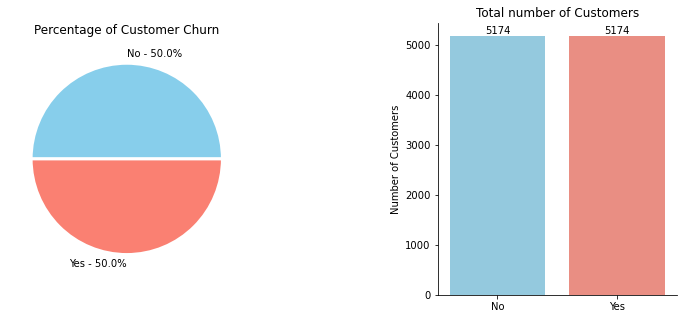

In [31]:
# Creating a space before the plot
print('\n\n')

# Creating a figure with two subplots
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Adjusting the space betweeen the subplots
plt.subplots_adjust(wspace=0.8)

# Defining the colors for each class
colors = ['skyblue', 'salmon', 'lightgreen']

# Number of observations in each category
data = target_resampled.value_counts()

# Creating a pie chart.
labels = [f'{label} - {np.round(data[label] / data.sum() * 100, 1)}%' for label in data.index]
ax1.pie(data, labels=labels, wedgeprops = {'linewidth' : 3, 'edgecolor' : 'white'},
        colors=colors)
ax1.set_title('Percentage of Customer Churn')

# Creating a bar plot.
ax2 = sns.barplot(data=data.to_frame(), y='Churn', x=data.index, palette=colors)

# Setting the label and title
ax2.set(xlabel=None, ylabel='Number of Customers')
ax2.bar_label(container=ax2.containers[0], labels=target_resampled.value_counts())
ax2.spines[['right', 'top']].set_visible(False)
ax2.set_title('Total number of Customers')
plt.savefig(f'images/balanced_data.png')

# Displaying the plot
plt.show()

<br>

### **Training the Models on the Balanced Dataset**


The existing code for training the baseline models will be reused, with the sole modification being the replacement of input data to accommodate the balanced dataset.

This ensures that the models are assessed under comparable conditions, with adjustments made solely to the input data for the purpose of evaluating their performance on a balanced dataset.

#### **Encoding the Target Variable of the Balanced Dataset**

In [32]:
# Creates an instance of the LabelEncoder
label_encoder = LabelEncoder()

# Applies label encoding to the columns
target_resampled = label_encoder.fit_transform(target_resampled)

#### **train-test split of the Resampled Dataset**

In [33]:
# train-test split
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(features_resampled,
                                                                                                target_resampled,
                                                                                                test_size=0.2,
                                                                                                random_state=42)

#### **Logistic Regression - Balanced Dataset**

In [34]:
# Initializing the Logistic Regression model
logreg_classifier_tuned = LogisticRegression(max_iter=5000)

# Model training
logreg_classifier_tuned.fit(X_train_resampled, y_train_resampled)

# Predictions
logreg_model_tuned_predictions = logreg_classifier_tuned.predict(X_test_resampled)

# Evaluations
logreg_accuracy_2 = balanced_accuracy_score(y_test_resampled,
                                            logreg_model_tuned_predictions)
logreg_precision_score_2 = precision_score(y_test_resampled,
                                           logreg_model_tuned_predictions)
logreg_recall_score_2 = recall_score(y_test_resampled,
                                     logreg_model_tuned_predictions)
logreg_f1_score_2 = f1_score(y_test_resampled, logreg_model_tuned_predictions,
                           average='weighted')

# Printing the result
print("Logistic Regression Accuracy (Balanced Dataset): ", logreg_accuracy_2)
print("Logistic Regression Precision (Balanced Dataset): ", logreg_precision_score_2)
print("Logistic Regression Recall Score (Balanced Dataset): ", logreg_recall_score_2)
print("Logistic Regression F1 Score (Balanced Dataset): ", logreg_f1_score_2)

Logistic Regression Accuracy (Balanced Dataset):  0.8610532487915827
Logistic Regression Precision (Balanced Dataset):  0.8741396263520157
Logistic Regression Recall Score (Balanced Dataset):  0.8474737845567207
Logistic Regression F1 Score (Balanced Dataset):  0.8608654090498843


#### **Naive Bayes Classifier - Balanced Dataset**

In [35]:
# Initialize the Naive Bayes Classifier model
nb_classifier_tuned = GaussianNB()

# Training the model
nb_classifier_tuned.fit(X_train_resampled, y_train_resampled)

# Predictions
nb_classifier_tuned_predictions = nb_classifier_tuned.predict(X_test_resampled)

# Evaluations
nb_classifier_accuracy_tuned = balanced_accuracy_score(y_test_resampled,
                                                 nb_classifier_tuned_predictions)
nb_classifier_precision_score_tuned = precision_score(y_test_resampled,
                                               nb_classifier_tuned_predictions)
nb_classifier_recall_score_tuned = recall_score(y_test_resampled,
                                          nb_classifier_tuned_predictions)
nb_classifier_f1_score_tuned = f1_score(y_test_resampled,
                                  nb_classifier_tuned_predictions,
                                  average='weighted')

# Printing the result
print("NB Classifier Accuracy (Balanced Dataset):", nb_classifier_accuracy_tuned)
print("NB Classifier Precision (Balanced Dataset):", nb_classifier_precision_score_tuned)
print("NB Classifier Recall Score (Balanced Dataset): ", nb_classifier_recall_score_tuned)
print("NB Classifier F1 Score (Balanced Dataset): ", nb_classifier_f1_score_tuned)

NB Classifier Accuracy (Balanced Dataset): 0.797912101352998
NB Classifier Precision (Balanced Dataset): 0.7604938271604939
NB Classifier Recall Score (Balanced Dataset):  0.880838894184938
NB Classifier F1 Score (Balanced Dataset):  0.7975100319427232


#### **Random Forest Classifier - Balanced Dataset**

In [36]:
# Initializing Random Forest Classifier model
rf_classifier_tuned = RandomForestClassifier(random_state=42)

# Training the model
rf_classifier_tuned.fit(X_train_resampled, y_train_resampled)

# Predictions
rf_classifier_tuned_predictions = rf_classifier_tuned.predict(X_test_resampled)

# Evaluations
rf_classifier_accuracy_tuned = balanced_accuracy_score(y_test_resampled,
                                                 rf_classifier_tuned_predictions)
rf_classifier_precision_score_tuned = precision_score(y_test_resampled,
                                                rf_classifier_tuned_predictions)
rf_classifier_recall_score_tuned = recall_score(y_test_resampled,
                                          rf_classifier_tuned_predictions)
rf_classifier_f1_score_tuned = f1_score(y_test_resampled,
                                  rf_classifier_tuned_predictions,
                                  average='weighted')

# Printing the result
print("Random Forest Classifier Accuracy (Balanced Dataset):", rf_classifier_accuracy_tuned)
print("Random Forest Classifier Precision (Balanced Dataset):", rf_classifier_precision_score_tuned)
print("Random Forest Classifier Recall Score (Balanced Dataset): ", rf_classifier_recall_score_tuned)
print("Random Forest Classifier F1 Score (Balanced Dataset): ", rf_classifier_f1_score_tuned)

Random Forest Classifier Accuracy (Balanced Dataset): 0.8573054511129017
Random Forest Classifier Precision (Balanced Dataset): 0.8768768768768769
Random Forest Classifier Recall Score (Balanced Dataset):  0.8350810295519543
Random Forest Classifier F1 Score (Balanced Dataset):  0.8569681177028201


# **MODEL EVALUATION**


Given the imbalanced nature of the telco dataset, where `the prediction of churn is the primary task`, it's important to select evaluation metrics that provide insights into the model's performance, especially in identifying instances of the minority class (churn).

As a result of the imbalanced datasets, it's crucial to prioritize metrics such as `Balanced_accuracy`, `Precision`, `Recall`, and the `F1 score`, as they focus on the challenges associated with minority class prediction.

### **Balanced Accuracy**

The `balanced accuracy score` is a metric used to assess the performance of a classification model, especially in the context of imbalanced datasets. It provides a balanced view of the classification accuracy by considering the proportion of correctly classified instances for each class.

A higher `balanced accuracy score` suggests better overall performance in terms of correctly classifying instances from both the majority and minority classes.

### **Precision**

In the context of the present task involving churn prediction, `precision` is an essential evaluation metric that quantifies the ability of the classifier to avoid incorrectly labeling instances as `churn` when they are actually `non-churn`.

It is concerned with the percentage of instances predicted as churn that are genuinely indicative of customer churn.

The best possible `precision` value is `1`, indicating that all positive predictions made by the model are correct (no false positives). This implies that every time the model `predicts churn`, it is indeed a case of `actual churn` [8].

### **Recall**

`Recall` is an evaluation metric that measures the ability of the classifier to correctly identify all positive samples, specifically instances of customer churn.

It quantifies the proportion of `actual churn cases` that the classifier correctly identifies. It emphasizes the model's capability to capture and recall instances of customer churn.

The `best` possible `recall` value is `1`, indicating that the classifier successfully identifies all instances of churn, and there are no instances of churn that go unnoticed.

A `recall` value close to 1 implies that the model effectively captures and identifies almost all instances of customer churn. This is crucial in scenarios where missing even a single instance of churn is costly or undesirable [9].

### **F1 Score**

In the telco churn prediction, the `F1 score` serves as a composite metric that balances the trade-off between precision and recall.

It combines both precision and recall into a single metric, providing a balanced assessment of a classifier's performance.

The best possible F1 score is 1, indicating a perfect balance between precision and recall.

 A high F1 score indicates that the classifier is achieving a balance between minimizing false positives and false negatives. This is valuable in the churn prediction, where both precision and recall are critical to making accurate predictions while avoiding unnecessary interventions or missing potential churners [10].

### **Comparison of Model Performance**

In [37]:
#************************* LOGISTIC REGRESSION BASELINE MODEL *************************

# Predictions
logreg_model_predictions = logreg_classifier.predict(X_test)

# Evaluations
logreg_accuracy = balanced_accuracy_score(y_test, logreg_model_predictions)
logreg_precision_score = precision_score(y_test, logreg_model_predictions)
logreg_recall_score = recall_score(y_test, logreg_model_predictions)
logreg_f1_score = f1_score(y_test, logreg_model_predictions,
                           average='weighted')


#************************* NAIVE BAYES CLASSIFIER BASELINE MODEL *************************

# Predictions
nb_classifier_predictions = nb_classifier.predict(X_test)

# Evaluations
nb_classifier_accuracy = balanced_accuracy_score(y_test,
                                                 nb_classifier_predictions)
nb_classifier_precision_score = precision_score(y_test,
                                               nb_classifier_predictions)
nb_classifier_recall_score = recall_score(y_test, nb_classifier_predictions)
nb_classifier_f1_score = f1_score(y_test, nb_classifier_predictions,
                             average='weighted')



#************************* RANDOM FOREST CLASSIFIER BASELINE MODEL *************************

# Predictions
rf_classifier_predictions = rf_classifier.predict(X_test)

# Evaluations
rf_classifier_accuracy = balanced_accuracy_score(y_test,
                                                 rf_classifier_predictions)
rf_classifier_precision_score = precision_score(y_test,
                                                rf_classifier_predictions)
rf_classifier_recall_score = recall_score(y_test,
                                          rf_classifier_predictions)
rf_classifier_f1_score = f1_score(y_test,
                                  rf_classifier_predictions,
                                  average='weighted')


#************************* LOGISTIC REGRESSION TUNED MODEL (BALANCED DATASET) *************************

# Predictions
logreg_model_tuned_predictions = logreg_classifier_tuned.predict(X_test_resampled)

# Evaluations
logreg_accuracy_2 = balanced_accuracy_score(y_test_resampled,
                                            logreg_model_tuned_predictions)
logreg_precision_score_2 = precision_score(y_test_resampled,
                                           logreg_model_tuned_predictions)
logreg_recall_score_2 = recall_score(y_test_resampled,
                                     logreg_model_tuned_predictions)
logreg_f1_score_2 = f1_score(y_test_resampled, logreg_model_tuned_predictions,
                           average='weighted')


#************************* NAIVE BAYES CLASSIFIER TUNED MODEL (BALANCED DATASET) *************************

# Predictions
nb_classifier_tuned_predictions = nb_classifier_tuned.predict(X_test_resampled)

# Evaluations
nb_classifier_accuracy_tuned = balanced_accuracy_score(y_test_resampled,
                                                 nb_classifier_tuned_predictions)
nb_classifier_precision_score_tuned = precision_score(y_test_resampled,
                                               nb_classifier_tuned_predictions)
nb_classifier_recall_score_tuned = recall_score(y_test_resampled,
                                          nb_classifier_tuned_predictions)
nb_classifier_f1_score_tuned = f1_score(y_test_resampled,
                                  nb_classifier_tuned_predictions,
                                  average='weighted')


#************************* RANDOM FOREST CLASSIFIER TUNED MODEL (BALANCED DATASET) *************************

# Predictions
rf_classifier_tuned_predictions = rf_classifier_tuned.predict(X_test_resampled)

# Evaluations
rf_classifier_accuracy_tuned = balanced_accuracy_score(y_test_resampled,
                                                 rf_classifier_tuned_predictions)
rf_classifier_precision_score_tuned = precision_score(y_test_resampled,
                                                rf_classifier_tuned_predictions)
rf_classifier_recall_score_tuned = recall_score(y_test_resampled,
                                          rf_classifier_tuned_predictions)
rf_classifier_f1_score_tuned = f1_score(y_test_resampled,
                                  rf_classifier_tuned_predictions,
                                  average='weighted')


### **A Dataframe of the Models' performance**

In [38]:
# Create a dictionary with the evaluation results
result_data = {
    'Model': ['Logistic Regression Baseline', 'Naive Bayes Baseline', 'Random Forest Baseline',
              'Logistic Regression Tuned', 'Naive Bayes Tuned', 'Random Forest Tuned'],
    'Accuracy': [logreg_accuracy, nb_classifier_accuracy, rf_classifier_accuracy,
                  logreg_accuracy_2, nb_classifier_accuracy_tuned, rf_classifier_accuracy_tuned],
    'Precision': [logreg_precision_score, nb_classifier_precision_score, rf_classifier_precision_score,
                  logreg_precision_score_2, nb_classifier_precision_score_tuned, rf_classifier_precision_score_tuned],
    'Recall': [logreg_recall_score, nb_classifier_recall_score, rf_classifier_recall_score,
               logreg_recall_score_2, nb_classifier_recall_score_tuned, rf_classifier_recall_score_tuned],
    'F1 Score': [logreg_f1_score, nb_classifier_f1_score, rf_classifier_f1_score,
                 logreg_f1_score_2, nb_classifier_f1_score_tuned, rf_classifier_f1_score_tuned]
}

# Create a DataFrame
results_df = pd.DataFrame(result_data)

# Display the DataFrame
display(results_df)


,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression Baseline,0.751040,0.687117,0.600536,0.817846
1,Naive Bayes Baseline,0.738369,0.435864,0.892761,0.684321
2,Random Forest Baseline,0.688360,0.651685,0.466488,0.780642
3,Logistic Regression Tuned,0.861053,0.874140,0.847474,0.860865
4,Naive Bayes Tuned,0.797912,0.760494,0.880839,0.797510
5,Random Forest Tuned,0.857305,0.876877,0.835081,0.856968


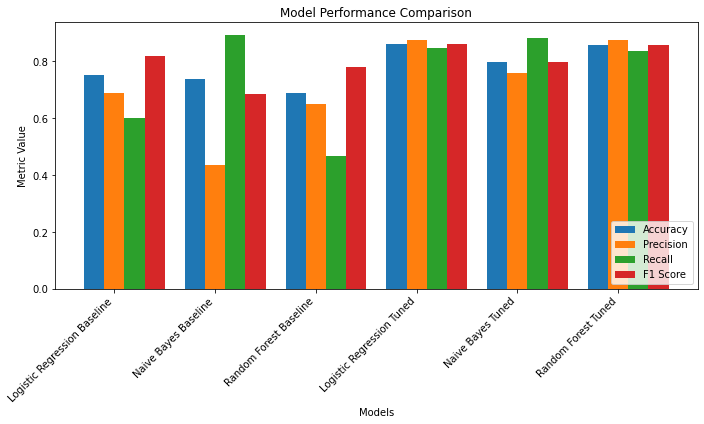

In [39]:
# Creating a plot to compare the models' performance using the obtained result dataframe

# Creating a space before the plot
print('\n\n')

# Setting the figure size
plt.figure(figsize=(10, 6))

models = results_df['Model']
metrics = results_df.columns[1:]


for i, metric in enumerate(metrics):
    plt.bar(np.arange(len(models)) + i * 0.2, results_df[metric], width=0.2, label=metric)

plt.xlabel('Models')
plt.xticks(np.arange(len(models)) + 0.2, models, rotation=45, ha='right')
plt.ylabel('Metric Value')
plt.title('Model Performance Comparison')
plt.savefig(f'images/model_comparison.png')
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

The depicted graph illustrates noteworthy enhancements in all performance metrics for the models following tuning, particularly when employing a balanced dataset.

Notably, the logistic regression model exhibited the most substantial improvement, ultimately achieving the highest F1 score among the tuned models.

This observation underscores the effectiveness of dataset balancing techniques in refining model performance and highlights the logistic regression model as particularly promising in the context of the analyzed metrics.

# SUMMARY


Three machine learning models, namely Logistic Regression, Random Forest Classifier, and Naive Bayes Classifier, were employed in the Telco Churn Prediction.

The primary goal was to construct a predictive model capable of identifying customers with a likelihood of churning within the telecommunications industry.

The overarching aim was to provide telecom companies with a proactive tool that facilitates the implementation of targeted retention strategies, thereby enhancing overall customer satisfaction.

This utilization of machine learning techniques represents a strategic approach for addressing churn-related challenges in the dynamic landscape of the telecommunications sector.

## FINDINGS

**Logistic Regression**

  - The model attained a **`balanced accuracy`** of **`86.25%`**, accompanied by an **`F1 score`** of **`86.23%`**, showcasing a well-balanced compromise between precision and recall. Its suitability for interpretability renders it adept at elucidating the influence of features on predictions.

 ***Advantages***

  The strengths lie in its interpretability, simplicity, and efficient training speed.

 ***Drawbacks***

  However, there are limitations to consider, such as potential challenges in capturing intricate non-linear relationships within the data.

<br>

**Naive Bayes Classifier**

 - Attained a **`balanced accuracy`** registering at **`79.79%`** coupled with an **`F1 score`** of **`79.75%`**.

  ***Advantages***

  Naive Bayes is a simple and fast algorithm. It's computationally efficient and requires a relatively small amount of training data to estimate the parameters.

  Implementation of the Naive Bayes classifier is straightforward. It is easy to understand and doesn't involve complex parameter tuning.

  ***Drawbacks***

  Naive Bayes can be sensitive to the quality of the input data. If the training set is not representative of the real-world data, or if certain features have missing values, it may lead to biased predictions.


<br>

**Random Forest Classifier**

 - The model attained a **`balanced accuracy`** of **`85.97%`** and an **`F1 score`** of **`85.9387%`**.

  ***Advantages***

  It demonstrates effectiveness in managing non-linear relationships and capturing intricate interactions within the dataset.

  The model is resilient against overfitting and offers insights into feature importance.

  ***Drawbacks***

  However, it necessitates a lengthier training period compared to Logistic Regression and might demand more meticulous hyperparameter tuning to achieve optimal performance.

# DISCUSSION

The evaluation of three distinct models revealed their effectiveness in predicting customer churn for telecom companies. Each model showcased commendable performance, with Random Forest excelling in capturing non-linear patterns, Logistic Regression providing a simpler, interpretable solution, and Naive Bayes demonstrating simplicity and faster training time.

<br>

**Strengths and Applications**

These predictive models offer invaluable insights, empowering telecom companies to proactively address customer churn through targeted retention strategies. The balanced accuracy and F1 scores indicate a harmonious trade-off between precision and recall, crucial metrics for evaluating model efficacy.

<br>

**Challenges and Considerations**

However, it's essential to acknowledge the impact of imbalanced datasets on model performance, particularly in terms of recall. To mitigate this issue, various strategies such as oversampling, undersampling, or alternative evaluation metrics were contemplated during the model tuning process.

<br>

**Recommendations for Model Enhancement**

To further optimize model performance, a focused approach on hyperparameter tuning, especially for Random Forest and Naive Bayes, is recommended.

Additionally, incorporating feature engineering techniques to generate more informative features has the potential to enhance overall model accuracy.

***Addressing Imbalanced Datasets***

Given the challenges posed by imbalanced datasets, exploring advanced techniques specifically designed to handle such scenarios is advisable.

In conclusion, the choice among these models should align with the unique needs and constraints of the telecom company, considering factors such as interpretability, computational efficiency, and the level of non-linearity in the data.

# CONCLUSION

The Telecommunication Churn Prediction has established a groundwork for proactive churn management within the telecommunications industry.

Although the showcased models demonstrate satisfactory performance, continuous improvement and the exploration of advanced techniques are essential to enhance the accuracy of predictions and provide superior decision support for telecom companies.

The iterative refinement process should remain integral, allowing for the adaptation to evolving data landscapes and ensuring the models stay at the forefront of churn prediction capabilities.

# References

[1] Introduction to Churn : https://www.kdnuggets.com/2019/05/churn-prediction-machine-learning.html

[2] Customer Churn and categorical plots: https://neptune.ai/blog/how-to-implement-customer-churn-prediction

[3] Churning : https://www.sciencedirect.com/science/article/pii/S2666603023000143

[4] Churn Rate : https://www.analyticsvidhya.com/blog/2022/09/bank-customer-churn-prediction-using-machine-learning/

[5] Dataset description : https://www.kaggle.com/datasets/blastchar/telco-customer-churn

[6] Dataset overview : https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113

[7] Encoding Categorical features : https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html#sklearn.preprocessing.LabelEncoder

[8] Precision as an Evaluation metric : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score

[9] Recall Score : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score

[10] F1 Score : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score